# Indicators of Heavy Traffic on I-94

In this project, we're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

## Concepts Used
- Jupyter Notebook
- Working with the Numpy libary
    - Sorting values using an array
- Working with the Pandas libary
    - Basic functions
    - Converting to diffrent datatypes
    - Boolean Indexing & Boolean Filtering
    - Using Pandas for Matplotlib
- Working with Matplotlib
    - Histograms
    - Grid Charts
    - Line Plot
    - Scatter Plots
    - Horizontal Bar Graph

## An Overview of the Columns

`holiday`: Categorical US National holidays plus regional holiday, Minnesota State Fair

`temp`: Numeric Average temp in kelvin

`rain_1h`: Numeric Amount in mm of rain that occurred in the hour

`snow_1h`: Numeric Amount in mm of snow that occurred in the hour 

`clouds_all`: Numeric Percentage of cloud cover 

`weather_main`: Categorical Short textual description of the current weather 

`weather_description`:Categorical Longer textual description of the current weather 

`date_time`: DateTime Hour of the data collected in local CST time 

`traffic_volume`: Numeric Hourly I-94 ATR 301 reported westbound traffic volume

## The I-94 Traffic Dataset

In [1]:
# Importing the libraries we will be using
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Reading in the Dataset
i_94 = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

# Explroing the first five rows
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
# Explroing the last five rows
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
# Exploring the whole Dataset as a one
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


After exploring our dataset as a whole we can see that our dataset has 9 columns and has 48204 rows. In addition, our dataset has zero null values and has three columns that have the datatype float64, has two columns that have the datatype int64 and have four columns that have the datatype object.

Each row in our dataset describes traffic and weather data for a specific hour we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.
A station located approximately midway between Minneapolis and Saint Paul records the traffic data [see the dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). For this station, the direction of the route is westbound (i.e., cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of the station. In other words, we should avoid generalizing our results for the entire I-94 highway.

## Analyzing Traffic Volume

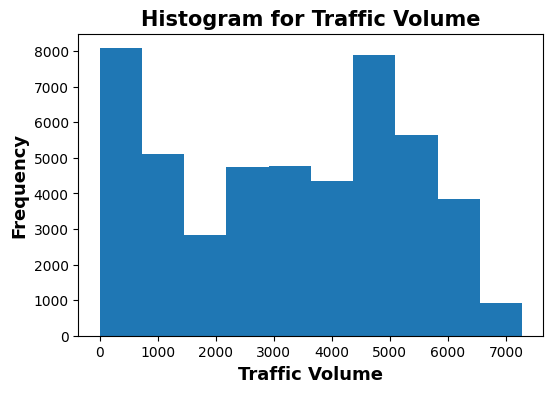

In [5]:
# Plotting a histogram for the "traffic_volume" column/variable
i_94.loc[:,"traffic_volume"].plot.hist()
plt.title("Histogram for Traffic Volume",fontweight="bold",fontsize=15)
plt.xlabel("Traffic Volume",fontweight="bold",fontsize=13)
plt.ylabel("Frequency",fontweight="bold",fontsize=13)
plt.show()

In [6]:
# Printing out a few statistics about the "traffic_volume" column/variable
i_94.loc[:,"traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.


About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).
This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.

## Traffic Volume: Day vs. Night

We'll start by dividing the dataset into two parts:
- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [7]:
# Converting the "date_time" column/variable to a "datetime" object
i_94.loc[:,"date_time"]=pd.to_datetime(i_94.loc[:,"date_time"])

In [8]:
# Finding out the unique values so we can easily filter out the night and day.
values_in_datetime = i_94.loc[:,"date_time"].dt.hour
unique_values_in_date_time = values_in_datetime.unique()
print(np.sort(unique_values_in_date_time))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [9]:
# Filtering the night and day dataframes 
day = i_94.copy()[(i_94.loc[:,"date_time"].dt.hour >=7) & (i_94.loc[:,"date_time"].dt.hour < 19)]
night = i_94.copy()[(i_94.loc[:,"date_time"].dt.hour >=19) | (i_94.loc[:,"date_time"].dt.hour < 7)]

# Finding out how many rows are for each dataframe
print("There are ",day.shape[0]," rows in the 'day' dataframe.")
print("\n")
print("There are",night.shape[0]," rows in the 'night' dataframe.")

There are  23877  rows in the 'day' dataframe.


There are 24327  rows in the 'night' dataframe.


This significant difference in row numbers between day and night is due to a few hours of missing data. For instance, if you look at rows 176 and 177 (i_94.iloc[176:178]), you'll notice there's no data for two hours (4 and 5).


## Traffic Volume: Day vs. Night (II)

Previously, we divided the dataset into two parts:

- Daytime data: hours from 7 AM to 7 PM (12 hours)
- Nighttime data: hours from 7 PM to 7 AM (12 hours)
Now we're going to compare the traffic volume at night and during day.

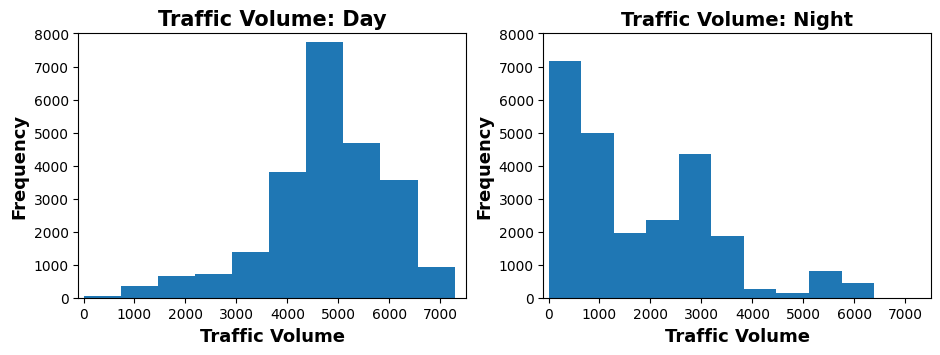

In [10]:
# Gird chart for the "traffic_volume" for both the "night" & "day" dataframe

# Day histogram
plt.figure(figsize=(11,3.5))
plt.subplot(1,2,1)
day.loc[:,"traffic_volume"].plot.hist()
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title("Traffic Volume: Day",fontweight="bold",fontsize=15)
plt.xlabel("Traffic Volume",fontweight="bold",fontsize=13)
plt.ylabel("Frequency",fontweight="bold",fontsize=13)

# Night histogram
plt.subplot(1,2,2)
night.loc[:,"traffic_volume"].plot.hist()
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title("Traffic Volume: Night",fontweight="bold",fontsize=14)
plt.xlabel("Traffic Volume",fontweight="bold",fontsize=13)
plt.ylabel("Frequency",fontweight="bold",fontsize=13)
plt.show()

In [11]:
# Printing out the statistics for the "traffic_volume" both "night" & "day" dataframe
print(day.loc[:,"traffic_volume"].describe())
print("\n")
print(night.loc[:,"traffic_volume"].describe())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


Both the two histograms have opposites shapes.  The "Traffic Volume: Day" histogram is a left-skewed histogram while the "Traffic Volume: Night" histogram is a right-skewed histogram.  

The right-skewed histogram (Traffic Volume: Night) indicates that during around 7-10 pm (the body) the traffic volume is at its highest point, but at this night's progress there is one more spike but after that, the frequency just seems to follow a negative slope. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.


On the other hand, the left-skewed histogram (Traffic Volume: Day) indicates that during the start of the day the traffic is slow but as the day progresses the traffic reaches its highest point (the body) then again starts slope takes a negative turn. In addition, this means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252)

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## Time Indicators

In [12]:
# Creating a new column/variable in the "day" dataframe and assign it to months from the "date_time" column/variable.
day['month'] = day.loc[:,'date_time'].dt.month
# From the "month" column/variable find out the averages for the other column/variable and assign it to a new dataframe called "by_month". For every singe column assign the average for that month to each column and then we can access that column in terms of each month's average for that column. 
by_month = day.groupby('month').mean()
# Printing out the onthly averages for the "traffic_volume" column/variable.
print(by_month['traffic_volume'])

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64


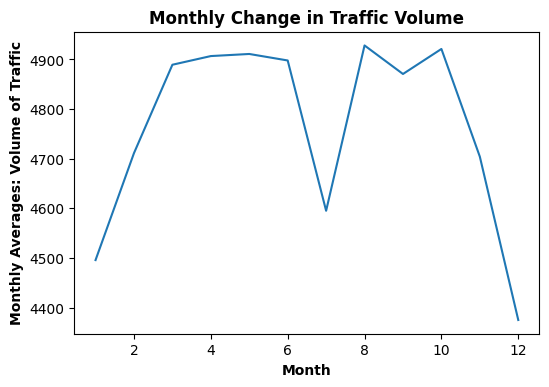

In [13]:
by_month.loc[:,"traffic_volume"].plot.line()
plt.title("Monthly Change in Traffic Volume",fontweight="bold")
plt.xlabel("Month",fontweight="bold")
plt.ylabel("Monthly Averages: Volume of Traffic",fontweight="bold")
plt.show()


The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July.

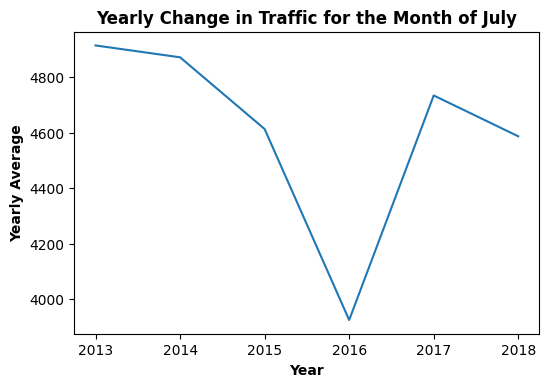

In [14]:
# Created a new column/variable named "year" and assigned it to the each year from the "date_time" column
day["year"]= day.loc[:,"date_time"].dt.year
# Filtered the data too only account for the month of july
only_july = day.loc[day.loc[:,"month"]==7]
# From the "year" column/variable find out the averages for the other column/variable and assign it to a new dataframe called "by_month". For every singe column assign the average for that month to each column and then we can access that column in terms of each only julys yearly average for that column. 
only_july_averages = only_july.groupby("year").mean()
# Plotting a line plot
only_july_averages.loc[:,"traffic_volume"].plot.line()
plt.title("Yearly Change in Traffic for the Month of July",fontweight="bold")
plt.xlabel("Year",fontweight="bold")
plt.ylabel("Yearly Average",fontweight="bold")
plt.show()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — [this article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.


## Time Indicators (II)

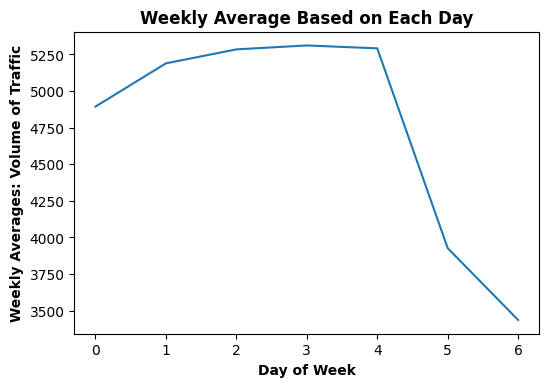

In [15]:
# Creating a new column/variable for our "day" dataframe, and assigning the column to the day of the week from the "date_time" column/variable
day["dayofweek"]= day.loc[:,"date_time"].dt.dayofweek
# For the "dayofweek" column/variable find out the averages for the other columns/variables and assign it to a new dataframe named "by_dayofweek_averages". For every single column assign the average for the week to each column and then we can access that column in terms of each day of week average for that column.
by_dayofweek_averages = day.groupby("dayofweek").mean()
# Plotting a line plot to visualize how the traffic volume cahnged each day of the week
by_dayofweek_averages.loc[:,"traffic_volume"].plot.line()
plt.title("Weekly Average Based on Each Day",fontweight="bold")
plt.xlabel("Day of Week",fontweight="bold")
plt.ylabel("Weekly Averages: Volume of Traffic",fontweight="bold")
plt.show()

After having a look at the line plot you can see that there is a settle difference between business days and weekends. Usually during the business days [0-4 (Monday-Friday) ] to traffic volume tends to follow a positive sloped indicating that every day there is an increase in traffic volume, but as soon as we hit the numbers 5 and 6 (Saturday and Sunday) on the x-axis the graph takes a turn and follows a negative slope. Hence traffic volume is significantly heavier on the business days with values of over 5,000 cars during each business day, and traffic is lighter on weekends, with values below 4,000 cars a day.

## Time Indicators (III)

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. 

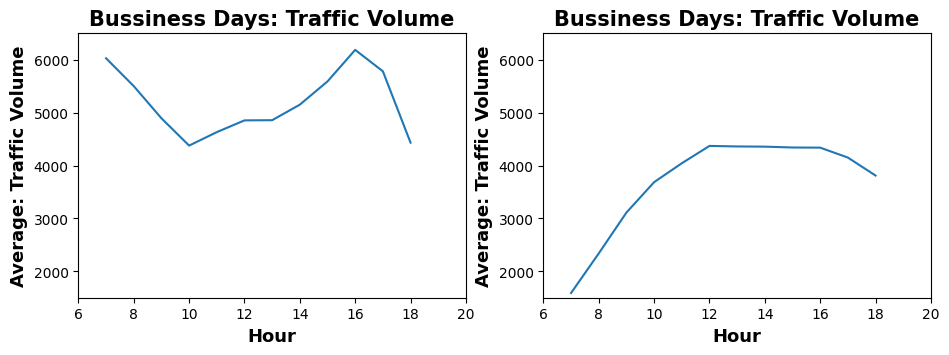

In [16]:
# Creating a new column/variable named "hour" that will store the hour of each=day from the "date_time" column
day["hour"]= day.loc[:,"date_time"].dt.hour
# Filtering the dataset to account for only bussiness days
bussiness_days = day.copy()[day.loc[:,"dayofweek"]<=4] # 4 == Friday
# Filtering the dataset to account for only weekends 
weekend = day.copy()[day.loc[:,"dayofweek"]>=5] # 5== Saturday
# From the "hour" column/variable find out the averages for the other columns/variable and assign it to a new dataframe named "by_hour_business". For every single column assigns the average for that month to each column and then we can access that column in terms of each hours average.
by_hour_bussiness = bussiness_days.groupby("hour").mean()
# From the "hour" column/variable find out the averages for the other columns/variable and assign it to a new dataframe named "by_hour_weekend". For every single column assigns the average for that month to each column and then we can access that column in terms of each hours average.
by_hour_weekend = weekend.groupby("hour").mean()

# Plotting a grid chart to visualize how the traffic volume cahnges by time of the day
plt.figure(figsize=(11,3.5))
# Bussiness days subplot
plt.subplot(1,2,1)
by_hour_bussiness.loc[:,"traffic_volume"].plot.line()
plt.title("Bussiness Days: Traffic Volume",fontweight="bold",fontsize=15)
plt.xlabel("Hour",fontweight="bold",fontsize=13)
plt.ylabel("Average: Traffic Volume",fontweight="bold",fontsize=13)
plt.xlim(6,20)
plt.ylim(1500,6500)
# Weekend subplot
plt.subplot(1,2,2)
by_hour_weekend.loc[:,"traffic_volume"].plot.line()
plt.title("Bussiness Days: Traffic Volume",fontweight="bold",fontsize=15)
plt.xlabel("Hour",fontweight="bold",fontsize=13)
plt.ylabel("Average: Traffic Volume",fontweight="bold",fontsize=13)
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.


## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: "temp", "rain_1h", "snow_1h", "clouds_all", "weather_main", "weather_description".

A few of these columns are numerical, so let's start by looking up their correlation values with "traffic_volume".

In [17]:
# Measuring the correlation between the "traffic_volume" column and all the other columns in our dataframe
day.corr()[["traffic_volume"]]

,traffic_volume
temp,0.128317
rain_1h,0.003697
snow_1h,0.001265
clouds_all,-0.032932
traffic_volume,1.000000
month,-0.022337
year,-0.003557
dayofweek,-0.416453
hour,0.172704


Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns ("rain_1h", "snow_1h", "clouds_all") don't show any strong correlation with traffic_value.

Let's generate a scatter plot to visualize the correlation between "temp" and "traffic_volume".

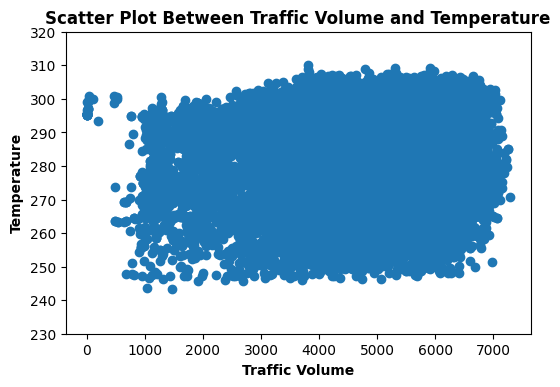

In [18]:
# Plotting a scatter plot between "traffic_volume" and "temp"
plt.scatter(day.loc[:,"traffic_volume"],day.loc[:,"temp"])
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.title("Scatter Plot Between Traffic Volume and Temperature",fontweight="bold")
plt.xlabel("Traffic Volume",fontweight="bold")
plt.ylabel("Temperature",fontweight="bold")
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: "weather_main" and "weather_description".

## Weather Types

To start, we're going to group the data by weather_main and look at the traffic_volume averages.


In [19]:
# Finding out the unique values in "weather_main"
print(day.loc[:,"weather_main"].unique())
print("\n")
# Finding out the unique values in "weather_description"
print(day.loc[:,"weather_description"].unique())

['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Smoke' 'Squall']


['scattered clouds' 'broken clouds' 'overcast clouds' 'sky is clear'
 'few clouds' 'light rain' 'light intensity drizzle' 'mist' 'haze'
 'proximity shower rain' 'moderate rain' 'drizzle' 'heavy intensity rain'
 'fog' 'proximity thunderstorm' 'heavy snow' 'snow' 'freezing rain'
 'shower snow' 'light rain and snow' 'light intensity shower rain'
 'thunderstorm with heavy rain' 'thunderstorm with rain'
 'thunderstorm with light rain' 'proximity thunderstorm with rain'
 'heavy intensity drizzle' 'Sky is Clear' 'very heavy rain'
 'proximity thunderstorm with drizzle' 'light snow'
 'thunderstorm with drizzle' 'thunderstorm' 'smoke' 'SQUALLS'
 'light shower snow' 'sleet' 'thunderstorm with light drizzle'
 'shower drizzle']


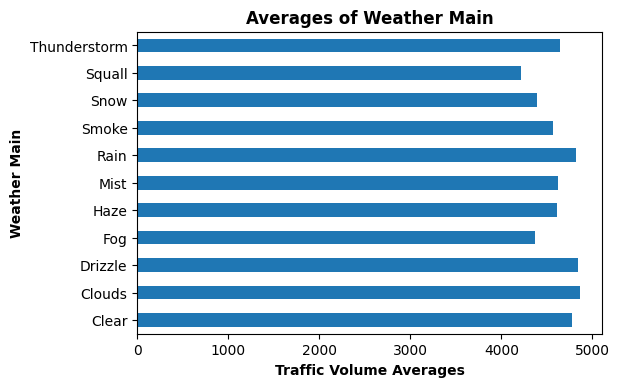

In [20]:
# From the "by_weather_main" column/variable find out the average for the other columns/variables and assign it to a new datafarme named "by_weather_main". For every single column assign the average for that month to each column and then we can acces that column in terms of each weather average.
by_weather_main = day.groupby('weather_main').mean()
# Plotting a horizotanl bar plot for the "traffic_volume" column in the "by_weather_main" dataframe
by_weather_main.loc[:,"traffic_volume"].plot.barh()
plt.title("Averages of Weather Main",fontweight="bold")
plt.xlabel("Traffic Volume Averages",fontweight="bold")
plt.ylabel("Weather Main",fontweight="bold")
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by "weather_description", which has a more granular weather classification.

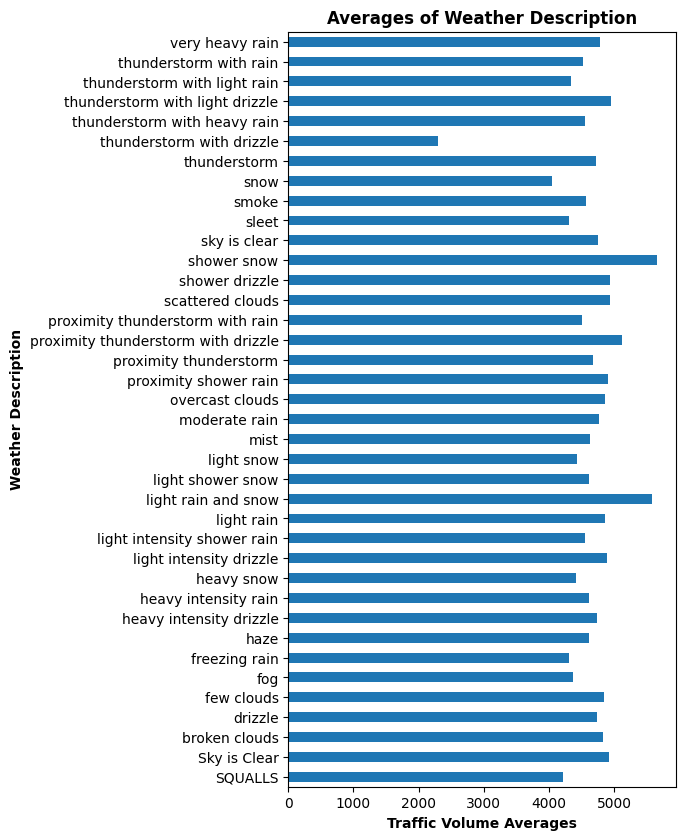

In [21]:
 # From the "by_weather_description" column/variable find out the average for the other columns/variables and assign it to a new datafarme named "by_weather_main". For every single column assign the average for that month to each column and then we can acces that column in terms of each weather average.
by_weather_description = day.groupby('weather_description').mean()
# Plotting a horizontal bar graph
by_weather_description.loc[:,"traffic_volume"].plot.barh(figsize=(5,10))
plt.title("Averages of Weather Description",fontweight="bold")
plt.xlabel("Traffic Volume Averages",fontweight="bold")
plt.ylabel("Weather Description",fontweight="bold")
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators.

It should be noted that given that traffic during the day (between 7:00 and 19:00) is significantly higher than during the night (from 19:00 to 7:00), the analysis included only the data for the day.


Time indicators:
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the = -weekends.
- On business days, the rush hours are around 7 and 16.

Weather indicators:
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle